# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [65]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [66]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [67]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [68]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [69]:
X_train = data.iloc[0:405, 0:13] 
y_train = data.iloc[0:405, 13]    

X_test = data.iloc[405:506, 0:13]  
y_test = data.iloc[405:506, 13]    

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(405, 13) (405,)
(101, 13) (101,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [70]:
from sklearn.linear_model import LinearRegression




In [71]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [72]:
# Output the predictions
print("Training Predictions: ", y_train_pred)
print("Testing Predictions: ", y_test_pred)

Training Predictions:  [29.13501919 24.84094934 31.15672488 29.32705305 28.77609734 25.45160258
 22.51751567 19.26378013 10.80670768 18.70934692 19.02263003 21.22433756
 20.26875462 19.57361637 19.62476776 19.17557146 20.52576264 16.99099768
 16.72402235 18.11107665 12.18881687 17.63180467 15.84445911 13.58199722
 15.64865216 14.07681047 15.58808755 15.78136658 20.16621562 21.68844672
 11.51268127 18.3144436  10.43766645 14.2957732  15.31058172 23.44796239
 22.08539326 22.71671379 22.618654   31.12157851 34.39099508 28.43850438
 25.07287782 24.37854811 22.68704602 21.25874701 19.65513727 17.71714447
  8.10624878 16.47425989 20.88521844 23.80328887 27.77620151 23.66096435
 14.42980317 32.28458918 24.4462253  33.34955514 22.69817327 21.59791798
 18.28658578 19.30569291 25.11092315 24.04855522 24.57571847 29.50582196
 24.18375192 20.48114379 16.50049016 20.16297546 25.35450049 21.53349631
 24.30320325 24.09214209 25.12445303 23.83628827 22.87542364 22.96587498
 21.13005265 21.74179782 28.

## 3. Calculate and print R-squared for both the training and the testing set.

In [73]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
print("R-squared for Training Set: ", r2_train)

r2_test = r2_score(y_test, y_test_pred)
print("R-squared for Testing Set: ", r2_test)


R-squared for Training Set:  0.7354553691891204
R-squared for Testing Set:  -0.252941537254477


## 4. Calculate and print mean squared error for both the training and the testing set.

In [74]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error for Training Set: ", mse_train)

mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error for Testing Set: ", mse_test)


Mean Squared Error for Training Set:  22.737189343488655
Mean Squared Error for Testing Set:  33.313606564098194


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [75]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error for Training Set: ", mae_train)

mae_test = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error for Testing Set: ", mae_test)


Mean Absolute Error for Training Set:  3.3068992102282793
Mean Absolute Error for Testing Set:  4.7633399250322235


## Classification Model Evaluation

In [76]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris() 

In [77]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [78]:
column_names = data.feature_names

In [79]:
df = pd.DataFrame(data['data'],columns=column_names)

In [80]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [81]:
target = pd.DataFrame(data.target)

In [82]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [83]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [92]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Print the shapes to confirm
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (120, 4)
Testing data shape: (30, 4)
Training labels shape: (120, 1)
Testing labels shape: (30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [93]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=200)

# 2. Train (fit) the model on the training data
logreg.fit(X_train, y_train.values.ravel())  # .ravel() is used to convert y_train into a 1D array

# 3. Generate predictions for the training set
y_train_pred = logreg.predict(X_train)

# 4. Generate predictions for the testing set
y_test_pred = logreg.predict(X_test)

# Output the predictions
print("Training Predictions: ", y_train_pred)
print("Testing Predictions: ", y_test_pred)


Training Predictions:  [0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 2 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]
Testing Predictions:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [94]:
from sklearn.metrics import accuracy_score

# 1. Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: ", train_accuracy)

# 2. Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: ", test_accuracy)


Training Accuracy:  0.975
Testing Accuracy:  1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [95]:
from sklearn.metrics import balanced_accuracy_score

# 1. Calculate balanced accuracy for the training set
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
print("Balanced Accuracy for Training Set: ", train_balanced_accuracy)

# 2. Calculate balanced accuracy for the testing set
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
print("Balanced Accuracy for Testing Set: ", test_balanced_accuracy)


Balanced Accuracy for Training Set:  0.975609756097561
Balanced Accuracy for Testing Set:  1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [96]:
from sklearn.metrics import precision_score

# 1. Calculate precision for the training set
train_precision = precision_score(y_train, y_train_pred, average='weighted')
print("Precision for Training Set: ", train_precision)

# 2. Calculate precision for the testing set
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print("Precision for Testing Set: ", test_precision)


Precision for Training Set:  0.9767857142857144
Precision for Testing Set:  1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [97]:
from sklearn.metrics import recall_score

# 1. Calculate recall for the training set
train_recall = recall_score(y_train, y_train_pred, average='weighted')
print("Recall for Training Set: ", train_recall)

# 2. Calculate recall for the testing set
test_recall = recall_score(y_test, y_test_pred, average='weighted')
print("Recall for Testing Set: ", test_recall)


Recall for Training Set:  0.975
Recall for Testing Set:  1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [98]:
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print("F1 for Training Set: ", train_f1)

test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("F1 for Testing Set:", test_recall)

F1 for Training Set:  0.9749882794186592
F1 for Testing Set: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

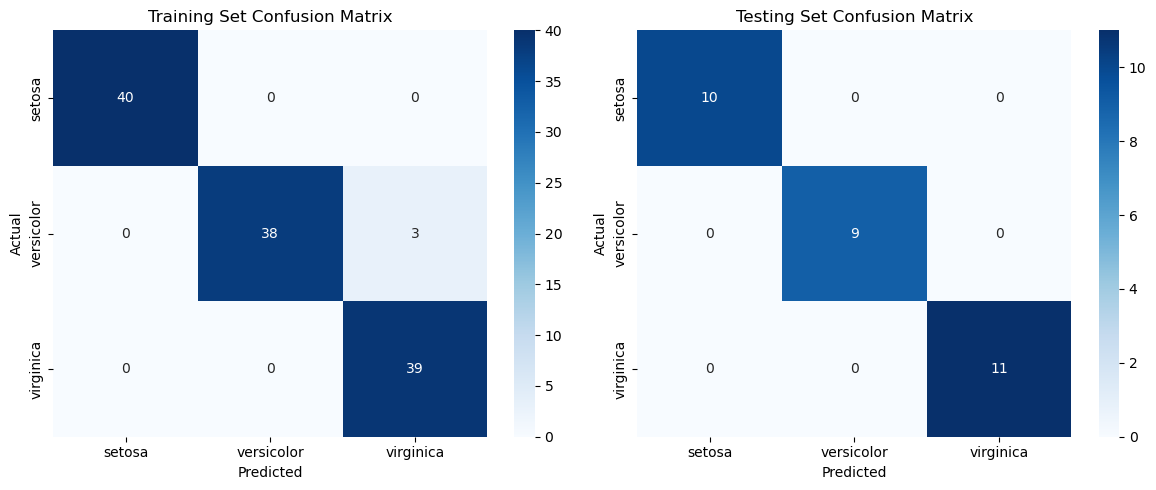

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate confusion matrix for the training set
train_cm = confusion_matrix(y_train, y_train_pred)

# 2. Generate confusion matrix for the testing set
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

# Training set confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title('Training Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Testing set confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title('Testing Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [91]:
# Have fun here !